># A proof-of-concept (PoC) work for HISS waves: Statistical Independence between the magnitute of HISS waves starting with $[0.01-2] kHz$.

>- September, 2021. S. Chakraborty(<shibaji7@vt.edu>), G. S. Cunninghum

In [1]:
import os
import sys
sys.path.append("src/")
import numpy as np
import pandas as pd
import get_data as gd
import dump_data as dmap
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(["science", "ieee"])
from matplotlib.dates import DateFormatter, HourLocator
from matplotlib.colors import LogNorm
from netCDF4 import num2date

In [2]:
dates = [dt.datetime(2012,10,6) + dt.timedelta(i) for i in range(30*4)]
nds = gd.get_fetch_hiss_data(dates, "tmp/HISS_Analysis.nc")
B, freqs, L, Lstar, epoch = nds.variables["B_hiss"][:], nds.variables["freqs"][:], nds.variables["L"][:],\
                nds.variables["Lstar"][:], nds.variables["dunits"]
#os.system("rm tmp/HISS_Analysis.nc")
dunits = num2date(epoch[:], epoch.units, epoch.calendar, only_use_cftime_datetimes=False)
dunits = np.array([x._to_real_datetime() for x in dunits]).astype("datetime64[ns]")
dunits = [dt.datetime.utcfromtimestamp(x.astype(int) * 1e-9) for x in dunits]
ddates = list(set(dunits))
ddates.sort()

In [3]:
KpDf = dmap.fetch_Kp_data(ddates)
KpDf.head()

,date,date_m,Kp
0,2012-10-06 00:00:00,2012-10-06 01:30:00,2.333
1,2012-10-06 00:00:06,2012-10-06 01:30:00,2.333
2,2012-10-06 00:00:12,2012-10-06 01:30:00,2.333
3,2012-10-06 00:00:18,2012-10-06 01:30:00,2.333
4,2012-10-06 00:00:24,2012-10-06 01:30:00,2.333


In [5]:
# dmap.download_omni_dataset(dates)
# omni = dmap.get_omni_dataset(dates)[["DATE", "AE"]]
# omni = omni.set_index("DATE").resample("6s").interpolate().reset_index()
# o = pd.DataFrame()
# for d in ddates:
#     o = pd.concat([o, omni[(omni.DATE>=d) & (omni.DATE<d+dt.timedelta(1))]])
# omni = o.copy()
# omni.head()

In [6]:
B.shape, KpDf.shape

((1526400, 27), (1526400, 3))

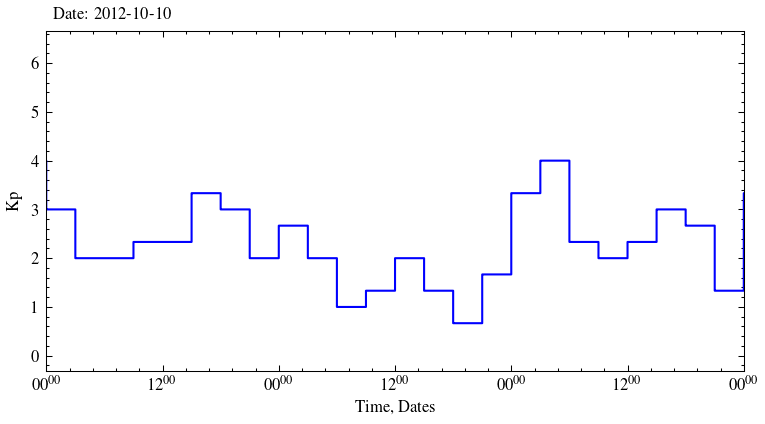

In [16]:
fig = plt.figure(dpi=150, figsize=(6,3))
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(DateFormatter(r"$%H^{%M}$"))
#ax.xaxis.set_major_locator(HourLocator(byhour=range(0, 24, 12)))
ax.plot(KpDf.date, KpDf.Kp, "b", ls="-", ms=0.3, ds="steps-post")
ax.set_ylabel("Kp")
ax.set_xlabel("Time, Dates")
ax.set_xlim(dates[4], dates[7])
_ = ax.text(0.01, 1.05, "Date: "+dates[4].strftime("%Y-%m-%d"), ha="left", va="center", transform=ax.transAxes)

/home/shibaji/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shibaji/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


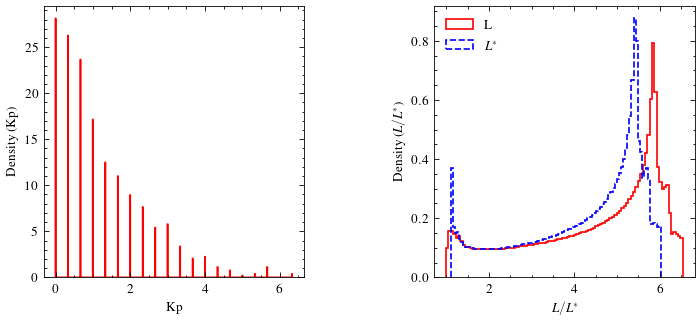

In [17]:
fig = plt.figure(dpi=120, figsize=(7,3))
ax = fig.add_subplot(121)
ax.hist(KpDf.Kp, bins=1000, histtype="step", color="r", density=True)
ax.set_ylabel("Density (Kp)")
ax.set_xlabel("Kp")
ax = fig.add_subplot(122)
ax.hist(L, bins=100, histtype="step", color="r", density=True, label="L")
ax.hist(Lstar, bins=100, histtype="step", color="b", density=True, label=r"$L^*$")
ax.legend(loc=2)
ax.set_ylabel(r"Density ($L/L^*$)")
_ = ax.set_xlabel(r"$L/L^*$")
fig.subplots_adjust(wspace=0.5, hspace=0.5)

In [18]:
# fig = plt.figure(dpi=120, figsize=(6,3))
# ax = fig.add_subplot(111)
# norm = LogNorm()
# ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))
# ax.xaxis.set_major_locator(HourLocator(byhour=range(0, 24, 4)))
# ax.pcolormesh(_dic_["epoch"], _dic_["freqs"], _dic_["frames"].T,  cmap=plt.cm.Spectral, norm=norm)
# pos = ax.get_position()
# cpos = [pos.x1 + 0.025, pos.y0 + 0.0125,
#         0.015, pos.height * 0.8]                # this list defines (left, bottom, width, height
# cax = fig.add_axes(cpos)
# cb2 = mpl.colorbar.ColorbarBase(cax, cmap=plt.cm.Spectral, norm=norm, spacing="uniform", orientation="vertical")
# cb2.set_label(r"PSD [$B^2(f)$], $nT^2Hz^{-1}$")
# ax.set_xlabel("Time, UT")
# ax.text(0.01, 1.05, "Date: "+dates[0].strftime("%Y-%m-%d"), ha="left", va="center", transform=ax.transAxes)
# _=ax.set_ylabel("Wave Frequency, Hz")

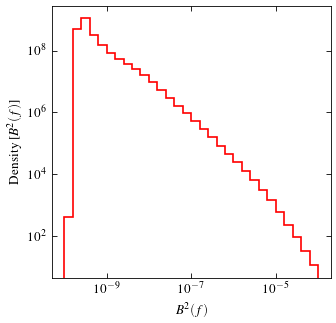

In [19]:
fig = plt.figure(dpi=120, figsize=(3,3))
ax = fig.add_subplot(111)
ax.set_ylabel(r"Density [$B^2(f)$]")
ax.set_xlabel(r"$B^2(f)$")
bins = 10**(np.linspace(-10,-4,31))
_ = ax.hist(B.ravel(), bins=bins, histtype="step", color="r", density=True)
ax.set_yscale("log")
ax.set_xscale("log")

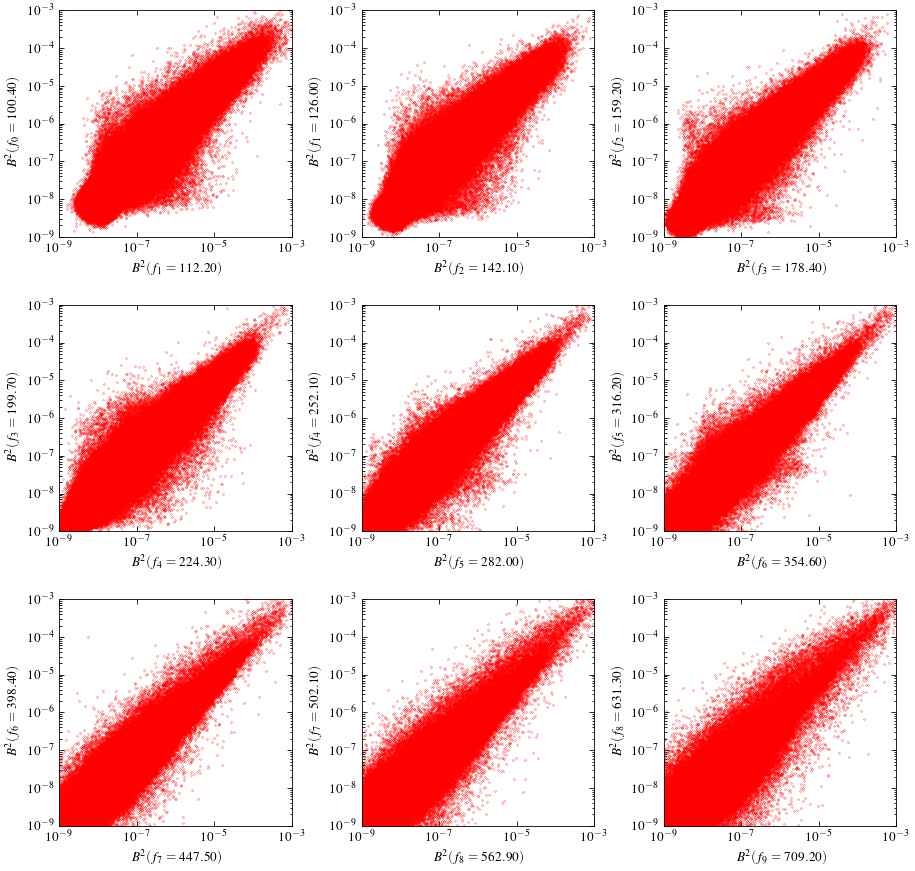

In [7]:
fig = plt.figure(dpi=120, figsize=(9,9))
for i in range(9):
    ax = fig.add_subplot(331+i)
    ax.set_ylabel(r"$B^2(f_%d=%.02f)$"%(i,freqs[2*i]))
    ax.set_xlabel(r"$B^2(f_%d=%.02f)$"%(i+1,freqs[2*i+1]))
    ax.loglog(B[:,2*i], B[:,2*i+1], "ro", ms=0.2)
    ax.set_xlim(1e-9,1e-3)
    ax.set_ylim(1e-9,1e-3)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

(1526400,) (1526400,)


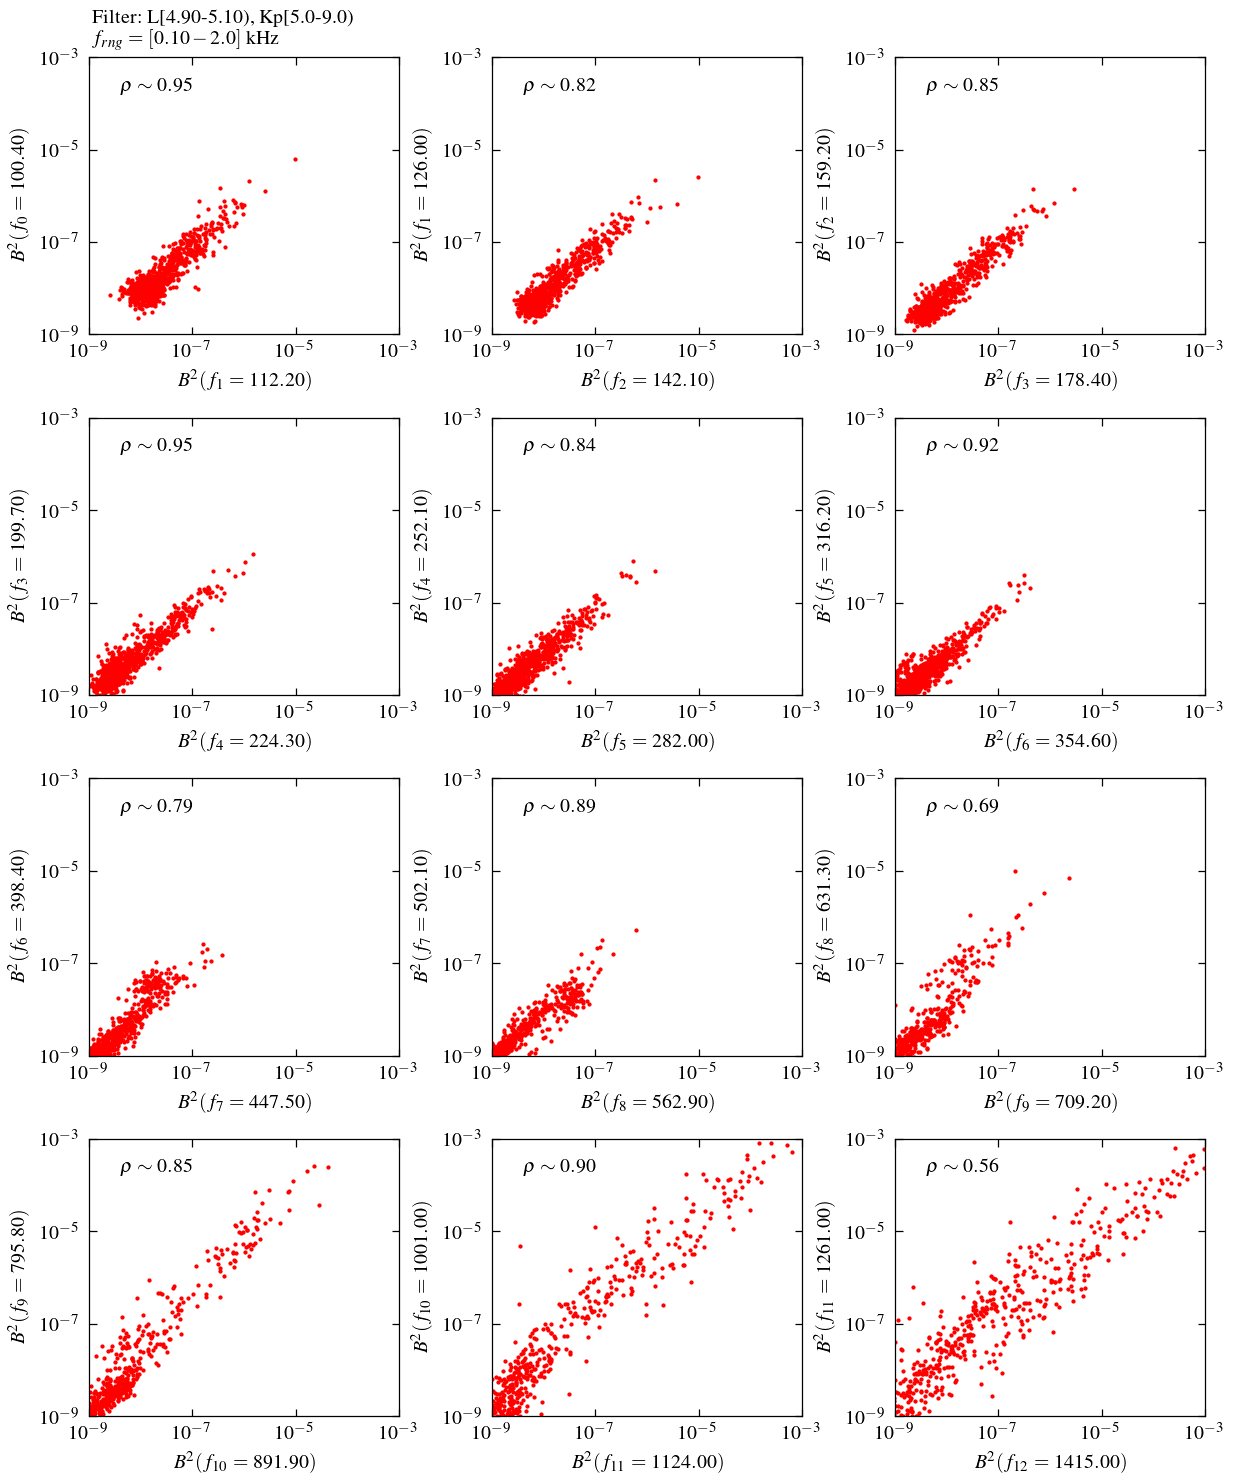

In [46]:
from scipy.stats import pearsonr
# Binning data based on Kp and L values
Lc, dL = 5, 0.2
# Bin index for Kp and L
Kp = np.array(KpDf.Kp)
print(Kp.shape, L.shape)
i, j = 0, 0
Kp_bin, L_bin = np.array([5,9]), np.array([Lc-dL/2, Lc+dL/2])
idx = (Kp>=Kp_bin[0]) & (Kp<Kp_bin[1]) & (L>=L_bin[0]) & (L<L_bin[1])
f = B[idx,:]

fig = plt.figure(dpi=180, figsize=(8,10))
for i in range(12):
    ax = fig.add_subplot(4,3,1+i)
    ax.set_ylabel(r"$B^2(f_{%d}=%.02f)$"%(i,freqs[2*i]))
    ax.set_xlabel(r"$B^2(f_{%d}=%.02f)$"%(i+1,freqs[2*i+1]))
    corr, _ = pearsonr(f[:,2*i], f[:,2*i+1])
    ax.loglog(f[:,2*i], f[:,2*i+1], "ro", ms=0.7)
    ax.set_xlim(1e-9,1e-3)
    ax.set_ylim(1e-9,1e-3)
    ax.text(0.1, 0.9, r"$\rho\sim %.2f$"%(corr), ha="left", va="center", transform=ax.transAxes)
    if i == 0: 
        txt = "Filter: L[%.2f-%.2f), Kp[%.1f-%.1f)\n"%(L_bin[0], L_bin[1], Kp_bin[0], Kp_bin[1])
        txt += r"$f_{rng}=[%.2f-%.1f]$ kHz"%(freqs[0]*1e-3, freqs[-1]*1e-3)
        ax.text(0.01, 1.1, txt, ha="left", va="center", transform=ax.transAxes)
fig.subplots_adjust(wspace=0.3, hspace=0.3)